Data Mining project

In [1]:
import sys
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent="Optima")
import json
import pandas as pd
import requests
import csv
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import os
import re


!C:/Users/sdk19/anaconda3/python -m pip install wordcloud
!C:/Users/sdk19/anaconda3/python -m pip install gensim
!C:/Users/sdk19/anaconda3/python -m pip install spacy    
    
from wordcloud import WordCloud
import gensim
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import HTML, display
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\sdk19\\OneDrive\\Desktop\\umd sem2\\data mining\\project\\airbnbTrain.csv")
df.head()
df.host_response_rate.head()


0    0.95
1     NaN
2    1.00
3     NaN
4     NaN
Name: host_response_rate, dtype: float64

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdk19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [ ]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

In [54]:
df['description'] = strip_newline(df.description.astype('str'))

In [56]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [57]:
words_tr = list(sent_to_words(df.description))

In [59]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
words_tr = remove_stopwords(words_tr)

In [60]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    trigram = gensim.models.Phrases(bigram[words], min_count = tri_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    return bigram_mod, trigram_mod

In [61]:
bigram_tr, trigram_tr = bigrams(words_tr)

In [69]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [64]:
trigrams_tr = [trigram_tr[bigram_tr[review]] for review in words_tr]

In [70]:
def lemmatization(texts, allowed_postags=['NOUN','ADJ','VERB','ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [71]:
lemma_lg = lemmatization(trigrams_tr)

In [72]:
id2word_lg = gensim.corpora.Dictionary(lemma_lg)
id2word_lg.filter_extremes(no_below=10, no_above=0.35)
id2word_lg.compactify()
#id2word_lg.save('train_dict_lg')
corpus_lg = [id2word_lg.doc2bow(text) for text in lemma_lg]

In [73]:
from gensim.models import HdpModel
hdp = HdpModel(corpus_lg, id2word_lg, chunksize=10000)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\sdk19\anaconda3\lib\logging\__init__.py", line 1028, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\sdk19\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 172-173: character maps to <undefined>
Call stack:
  File "C:\Users\sdk19\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sdk19\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sdk19\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sdk19\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\sdk19\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in star

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\sdk19\anaconda3\lib\logging\__init__.py", line 1028, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\sdk19\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 234-235: character maps to <undefined>
Call stack:
  File "C:\Users\sdk19\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sdk19\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sdk19\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sdk19\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\sdk19\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in star

In [74]:
len(hdp.print_topics())

20

In [75]:
def strip_newline(series):
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [76]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['come','order','try','go','get','make','drink','plate','dish','restaurant','place',
#                  'would','really','like','great','service','came','got'])


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
    
def get_corpus(df):
    df['description'] = strip_newline(df.description.astype(str))
    words = list(sent_to_words(df.description))
    words = remove_stopwords(words)
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(df)

In [77]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train4 = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=20,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train4.save('lda_train4.model')

In [31]:
lda_train4.print_topics(10,num_words=15)[:10]

[(0,
  '0.018*"nan" + 0.018*"minute_drive" + 0.018*"fully_equipped" + 0.017*"guests" + 0.013*"stay_zeus" + 0.012*"minute_walk" + 0.011*"top_notch" + 0.011*"super_fast" + 0.011*"bath" + 0.011*"stay_enjoyable" + 0.011*"longer_term" + 0.010*"linens" + 0.010*"amenities_including" + 0.010*"space" + 0.010*"bath_products"'),
 (1,
  '0.040*"apartment" + 0.013*"walk" + 0.013*"restaurants" + 0.012*"neighborhood" + 0.011*"train" + 0.011*"one" + 0.011*"great" + 0.010*"manhattan" + 0.010*"located" + 0.010*"building" + 0.009*"street" + 0.009*"minutes" + 0.009*"close" + 0.008*"city" + 0.007*"min"'),
 (2,
  '0.027*"downtown" + 0.017*"neighborhood" + 0.016*"restaurants" + 0.014*"minutes" + 0.013*"house" + 0.012*"park" + 0.012*"close" + 0.012*"walk" + 0.011*"located" + 0.010*"miles" + 0.009*"available" + 0.009*"great" + 0.009*"street" + 0.008*"home" + 0.007*"access"'),
 (3,
  '0.012*"resort" + 0.012*"condo" + 0.012*"check" + 0.011*"bed" + 0.011*"hotel" + 0.010*"pool" + 0.009*"one" + 0.009*"full" + 0.009

In [86]:
train_vecs = []
for i in range(len(df)):
    top_topics = lda_train4.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    #topic_vec.extend([df.iloc[i].real_counts]) # counts of reviews for restaurant
    #topic_vec.extend([len(df.iloc[i].text)]) # length review
    train_vecs.append(topic_vec)

In [92]:
train_vecs

[[0.000625437,
  0.000625437,
  0.000625437,
  0.000625437,
  0.000625437,
  0.000625437,
  0.7910573,
  0.109068155,
  0.000625437,
  0.08924216,
  0.000625437,
  0.000625437,
  0.000625437,
  0.000625437,
  0.000625437,
  0.00062543707,
  0.000625437,
  0.000625437,
  0.000625437,
  0.000625437],
 [0.0007059724,
  0.0007059724,
  0.0007059724,
  0.020921763,
  0.0007059724,
  0.21719982,
  0.0007059724,
  0.0007059724,
  0.0007059724,
  0.0007059724,
  0.0007059724,
  0.10594474,
  0.0007059724,
  0.052835982,
  0.12757003,
  0.0007059724,
  0.0007059724,
  0.46564406,
  0.0007059724,
  0.0007059724],
 [0.12969774,
  0.00070534676,
  0.00070534676,
  0.2380574,
  0.00070534676,
  0.14184514,
  0.00070534676,
  0.07223646,
  0.054542053,
  0.01724182,
  0.116281025,
  0.00070534676,
  0.00070534676,
  0.07080996,
  0.00070534676,
  0.098518826,
  0.00070534676,
  0.00070534676,
  0.00070534676,
  0.053716116],
 [0.0035727757,
  0.0035727757,
  0.46756276,
  0.0035727757,
  0.003572775

In [93]:

#max_value = max(train_vecs[2])
#max_index = train_vecs[2].index(max_value)
#ax_index

df['topic']=train_vecs
#for i,r in df.iterrows():
    

In [94]:
df.topic.head()
topic=[]
#count=1
for i,r in df.iterrows():
    
    #print(max(train_vecs[i]))
    max_index=train_vecs[i].index(max(train_vecs[i]))
    topic.append(max_index)
 #   count=count+1


In [96]:
df['topic']=topic

In [97]:
df2=df[['id','topic']]

In [98]:
df2.to_csv('topicsLDA.csv')

host response rate and time


In [48]:
df.host_listings_count.isna().sum()

1005

In [3]:
#3l.isna().sum()
print("Null values:", df.room_type.isna().sum())
print(f"Proportion: {round((df.room_type.isna().sum()/len(df))*100, 1)}%")
df.room_type.value_counts()


Null values: 0
Proportion: 0.0%


Entire home/apt    101585
Private room        45101
Shared room          3188
Hotel room           1715
Name: room_type, dtype: int64

In [4]:
#3l.isna().sum()
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")
df.host_response_time.value_counts()


Null values: 30397
Proportion: 20.1%


within an hour        89709
within a few hours    19773
within a day           9625
a few days or more     2085
Name: host_response_time, dtype: int64

In [5]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.591791
unknown               0.200522
within a few hours    0.130438
within a day          0.063494
a few days or more    0.013754
Name: host_response_time, dtype: float64

In [6]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")


Null values: 30397
Proportion: 20.1%


In [7]:
print(df.host_response_rate.mean())
print(df.host_response_rate.median())
df.host_response_rate.describe()

0.9570380058090135
1.0


count    121192.000000
mean          0.957038
std           0.133022
min           0.000000
25%           0.990000
50%           1.000000
75%           1.000000
max           1.000000
Name: host_response_rate, dtype: float64

In [54]:
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 0.8, 0.95, 0.99, 1], 
                               labels=['0-49%', '50-89%', '90-95%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       88893
unknown    30397
50-89%     12772
90-95%     11261
0-49%       8266
Name: host_response_rate, dtype: int64

In [55]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,[ 'host_is_superhost', 'host_listings_count', 
                  'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 4])

1005

In [56]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']:
    df[col].fillna('Unknown', inplace=True)

In [57]:
df.host_identity_verified.value_counts()

False      85107
True       65477
Unknown     1005
Name: host_identity_verified, dtype: int64

# property type


In [58]:
pd.options.display.max_rows = 4000
#df.groupby('property_type').high_booking_rate.value_counts()
df.property_type.value_counts()

Apartment                 60376
House                     42673
Condominium               18161
Townhouse                  6437
Guest suite                5722
Guesthouse                 3565
Loft                       2425
Bungalow                   1946
Serviced apartment         1875
Villa                      1438
Boutique hotel             1081
Cottage                    1017
Resort                      757
Hotel                       711
Bed and breakfast           668
Other                       465
Hostel                      418
Camper/RV                   381
Aparthotel                  298
Tiny house                  276
Cabin                       268
Farm stay                   125
Boat                         86
Tent                         61
Earth house                  38
Castle                       34
Yurt                         30
Treehouse                    29
Campsite                     29
Dome house                   28
Houseboat                    25
Chalet  

In [59]:
df.property_type.replace({
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',  
    'Resort':'Hotel',
    'Boutique hotel':'Hotel',
    'Guesthouse':'Guest suite',
    'Bungalow':'House',
    
    
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel','Guest suite','Condominium','Townhouse']), 'property_type'] = 'Other'

In [60]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [61]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.isna().sum()
df.security_deposit.value_counts()
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')
df.security_deposit.describe()

count    151589.000000
mean        231.353779
std        1083.787204
min           0.000000
25%           0.000000
50%           0.000000
75%         250.000000
max      250000.000000
Name: security_deposit, dtype: float64

In [62]:
df.cleaning_fee.isna().sum()
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')
df.cleaning_fee.describe()

count    151589.000000
mean         81.836617
std          97.313879
min           0.000000
25%          20.000000
50%          59.000000
75%         105.000000
max        3383.000000
Name: cleaning_fee, dtype: float64

In [63]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')
df.extra_people.describe()

count    151589.000000
mean         13.392205
std          25.076080
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max         500.000000
Name: extra_people, dtype: float64

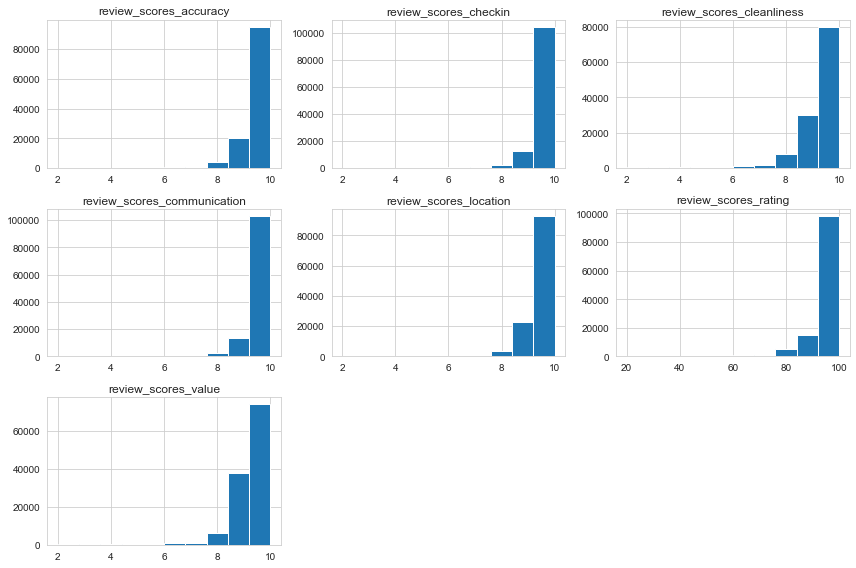

In [8]:
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [9]:
variables_to_plot.pop(5)

'review_scores_rating'

In [10]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['low', 'medium', 'high'],
               na_label='no reviews')

In [13]:
df.review_scores_value.value_counts()

high      73953
medium    37633
nan       30900
low        9103
Name: review_scores_value, dtype: int64

In [14]:
df_review=df[['id','review_scores_value']]
df_review.to_csv('review_value.csv')

In [68]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 90 ,95,98, 100],
           labels=['bad', 'low','moderate','good' ,'very_good'],
           na_label='no reviews')

In [69]:
df.review_scores_rating.value_counts()

very_good    45011
good         31563
nan          30793
moderate     24568
low          13024
bad           6630
Name: review_scores_rating, dtype: int64

In [70]:

df.cancellation_policy.value_counts()

strict_14_with_grace_period    67315
moderate                       40474
flexible                       37767
super_strict_60                 3313
super_strict_30                 1768
strict                           787
luxury_moderate                  115
luxury_super_strict_95            37
luxury_super_strict_125            7
luxury_no_refund                   6
Name: cancellation_policy, dtype: int64

In [72]:
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95':'other',
    'luxury_super_strict_125':'other',
    'luxury_no_refund':'other'
    }, inplace=True)

In [73]:
df.market.value_counts()

New York                                                 32143
Los Angeles                                              23069
San Diego                                                 8083
Austin                                                    6733
Las Vegas                                                 6207
D.C.                                                      5452
Seattle                                                   5399
Miami                                                     5151
Chicago                                                   5117
San Francisco                                             5106
Maui                                                      4649
Nashville                                                 4429
Oahu                                                      4296
Minneapolis                                               4001
New Orleans                                               3907
South Bay, CA                                          

In [74]:
df.market.replace({
    'South Bay CA': 'South Bay, CA',
    'East Bay CA': 'East Bay, CA',
    'Texas - Austin': 'Austin',
    'Maui': 'The Big Island',
    'Oahu': 'The Big Island',
    'Kauai': 'The Big Island',  
    'Big Island':'The Big Island',
    
    
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.market.isin(['New York', 'Los Angeles','San Diego','Austin','Las Vegas','D.C.','Seattle','Seattle','Miami','Chicago','San Francisco','Nashville','Minneapolis','New Orleans','South Bay, CA','The Big Island','Denver','Boston','Portland','Providence','East Bay, CA']), 'market'] = 'Other'

In [75]:
df.market.value_counts()

New York          32143
Los Angeles       23069
The Big Island    14185
San Diego          8083
Austin             6746
Las Vegas          6207
Other              5472
D.C.               5452
Seattle            5399
Miami              5151
Chicago            5117
San Francisco      5106
South Bay, CA      4530
Nashville          4429
Minneapolis        4001
New Orleans        3907
Denver             2916
Boston             2863
Portland           2863
East Bay, CA       1999
Providence         1951
Name: market, dtype: int64

In [5]:
df.to_csv('aribnbTestPython.csv')

df.head()

,id,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,...,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,{randomControl}
0,1060760,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",19,67,29,29,2.0,...,10.0,Entire home/apt,NaN,The apartment is located at the Beachwalk Reso...,NaN,FL,NaN,NaN,33009,113890
1,1040685,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0,0,0,0,1.0,...,9.0,Entire home/apt,NaN,You will not find a more adorable apartment! A...,NaN,NY,This apartment is in one of the best locations...,NaN,10019,116337
2,1001074,0,NaN,4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",0,0,0,0,1.0,...,NaN,Entire home/apt,$200.00,NaN,NaN,CA,NaN,NaN,90066,112297
3,1197330,0,NaN,2,"{Wifi,""Air conditioning"",""Free parking on prem...",24,173,54,84,2.5,...,NaN,Private room,NaN,NaN,NaN,MN,"House is 24 mins from downtown, it’s a quiet s...",NaN,55014,125404
4,1031737,0,Access the entire house. Garage will be locked.,2,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",4,64,34,64,1.0,...,10.0,Private room,NaN,Once you get here - you'll see. I won't be sur...,NaN,CA,Just outside the front door you will find publ...,NaN,90803,112921
